In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mags = np.arange(0, 256, 4, dtype=np.float32)

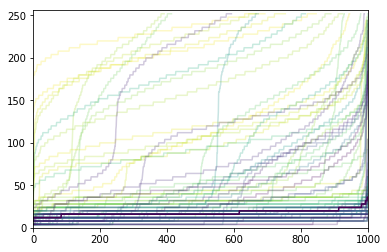

In [36]:
modelname = 'tutorial_ensadv'
# dataset = 'test'; index = 6705; skip = True
# dataset = 'train'; index = 38894; skip = True
# dataset = 'ours'; index = 0; skip = True
dataset = 'ours'; index = 1; skip = False
# steps = range(1, 80000, 800) + [80000]; last_step = 80000
steps = range(1, 100000, 1000) + [100000]; last_step = 100000
# steps = range(1, 86000, 1000); last_step = 100000
labels = np.load('gxr_%s/%s%d_labels.npy' % (modelname, dataset, index))
label0 = labels.squeeze(0)
plt.clf()
plt.ylim(0, 256)
plt.xlim(0, 1000)
for step in steps:
    conf = np.load('gxr_%s/%s%d_step%d.npy' % (modelname, dataset, index, step))
    cp = np.load('gxr_%s/center_preds_%s%d_step%d.npy' % (modelname, dataset, index, step))
    if skip and cp.squeeze(0) != label0:
        # skip snapshots where it was wrong
        continue

    progress = float(step) / last_step
    color = matplotlib.cm.viridis(1 - progress, alpha=0.25)
    amin = np.amin(conf, axis=1)
    argmin = np.argmin(conf, axis=1)
    gxr = np.where(np.equal(amin, 0), mags[argmin], np.nan)
    gxgrad = gxr[1000]
    gxrand = gxr[:1000]
    plt.plot(np.sort(gxrand), color=color)
    # plt.axhline(gxgrad, color=color)

# redraw the last one at full opacity
color = matplotlib.cm.viridis(1 - progress)
plt.plot(np.sort(gxrand), color=color)
plt.show()

In [37]:
cp

array([2])

In [ ]:
# ---

1


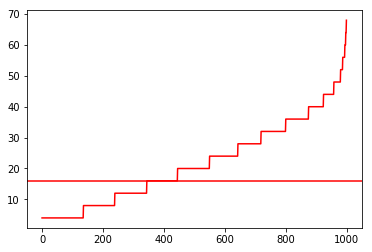

801


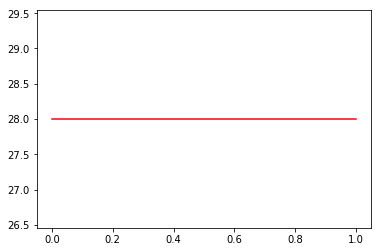

1601


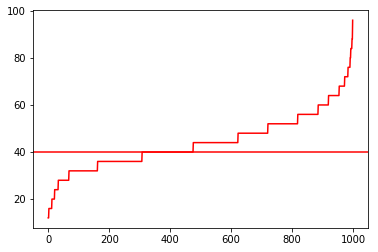

2401


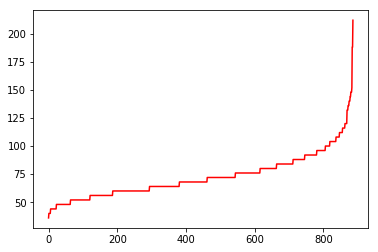

3201


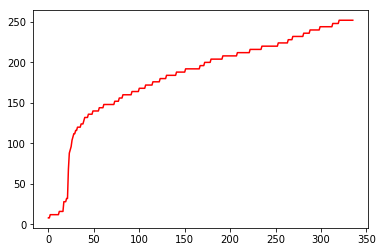

4001


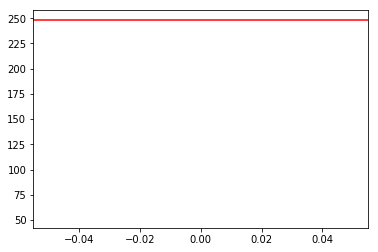

4801


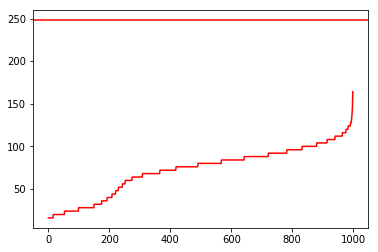

5601


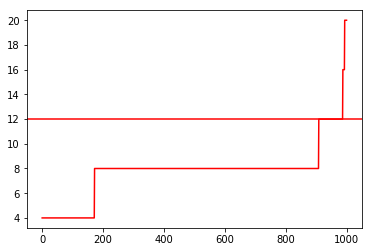

6401


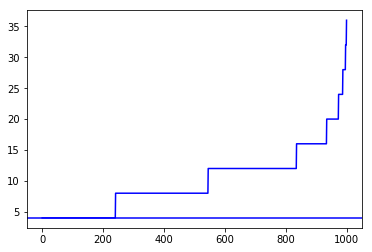

7201


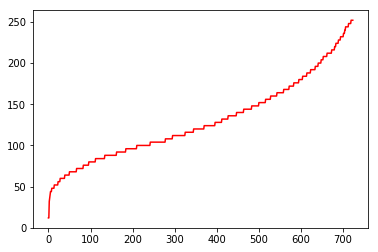

8001


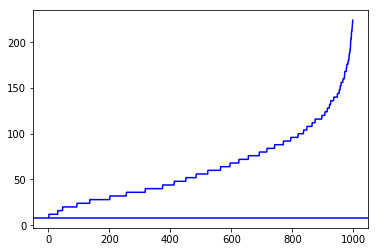

8801


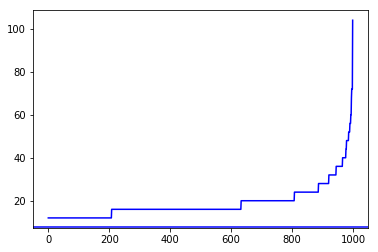

9601


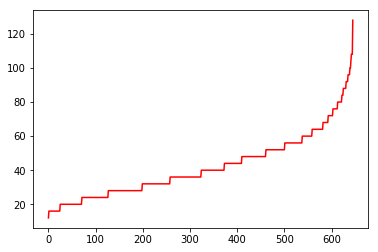

10401


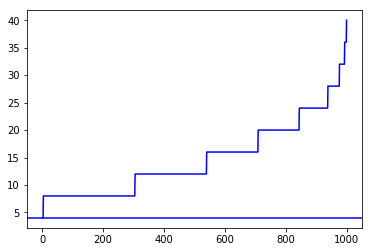

11201


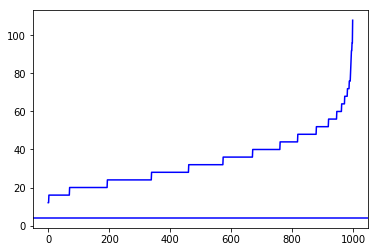

12001


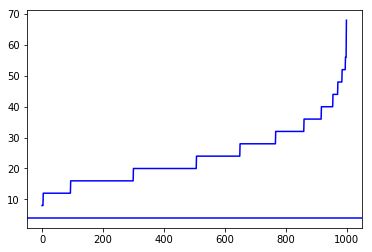

12801


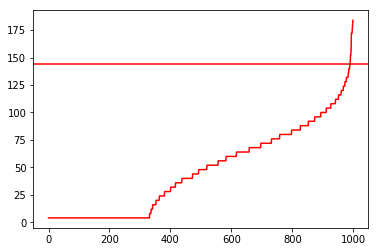

13601


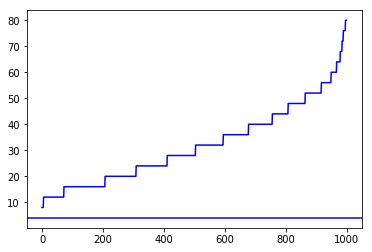

14401


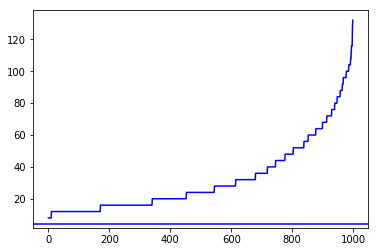

15201


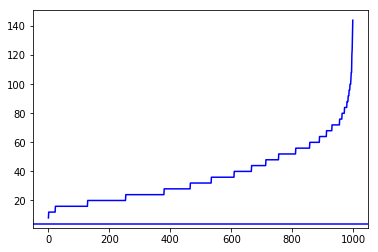

16001


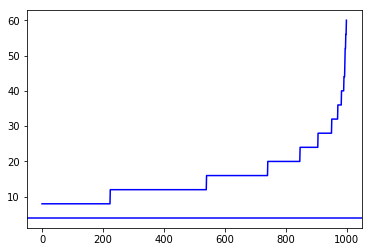

16801


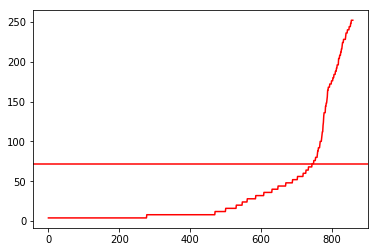

17601


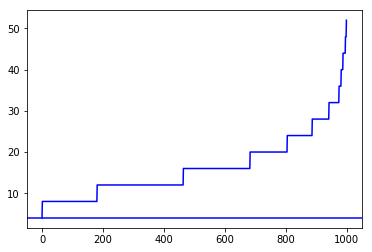

18401


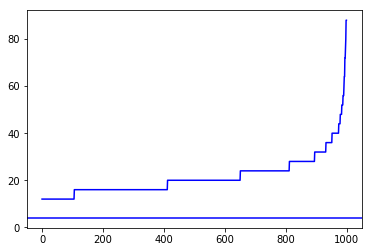

19201


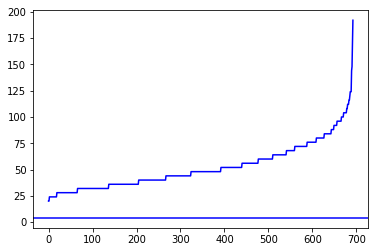

20001


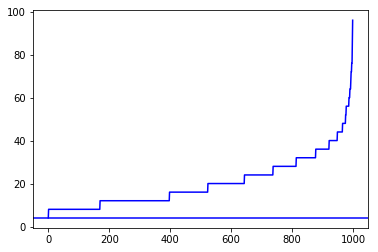

20801


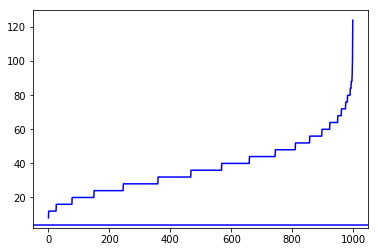

21601


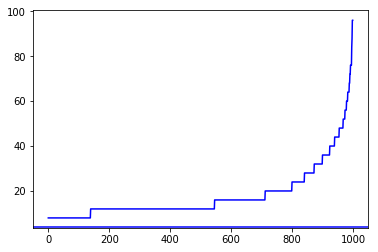

22401


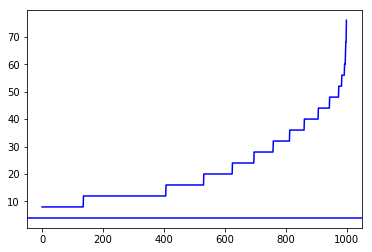

23201


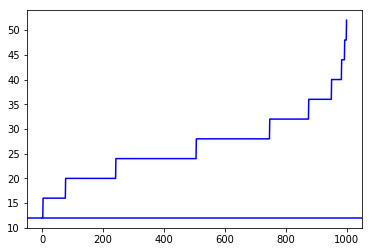

24001


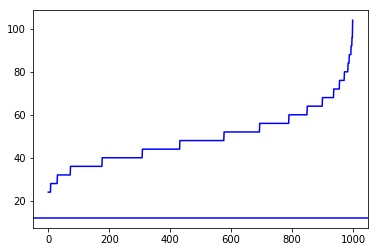

24801


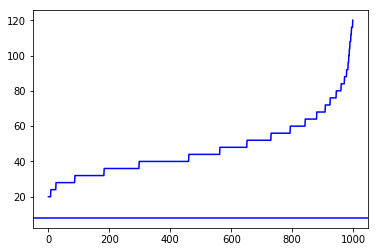

25601


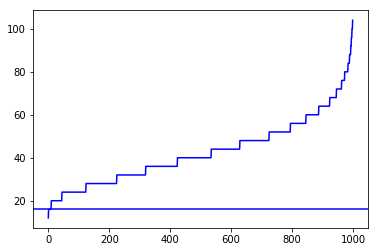

26401


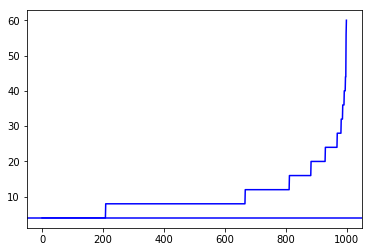

27201


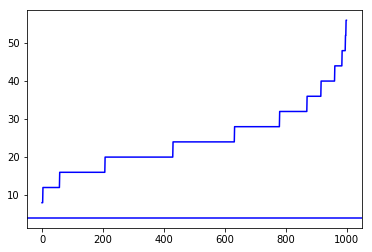

28001


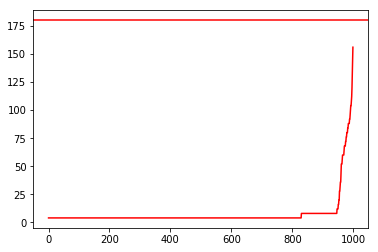

28801


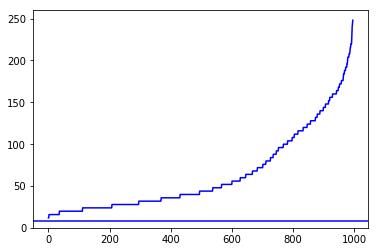

29601


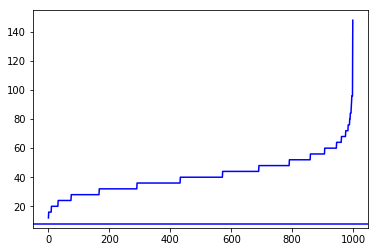

30401


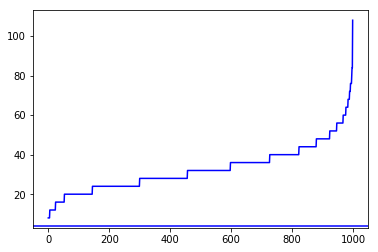

31201


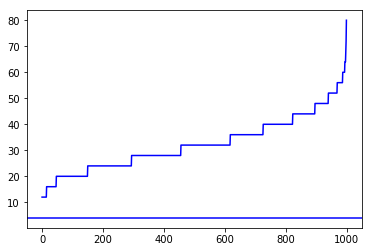

32001


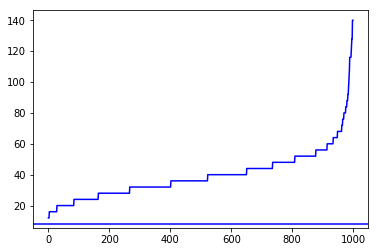

32801


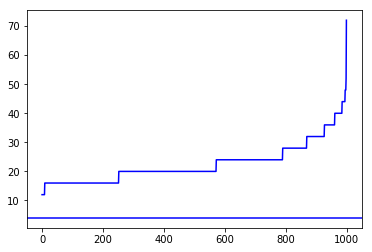

33601


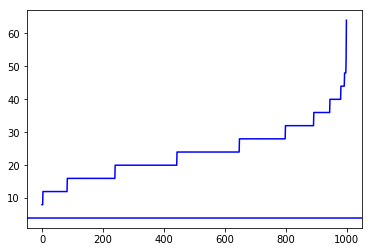

34401


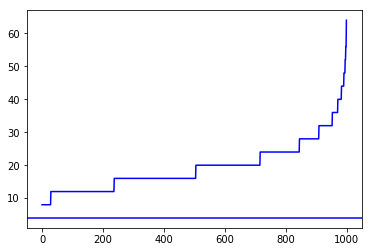

35201


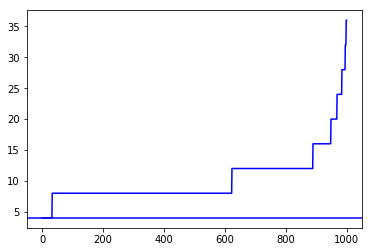

36001


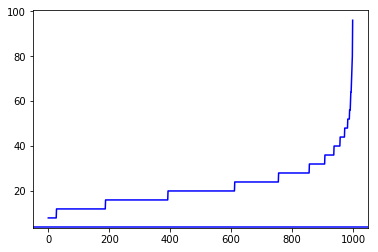

36801


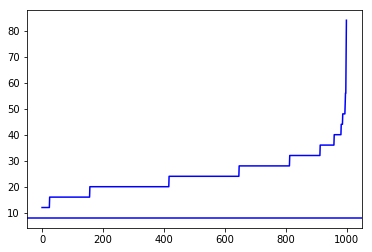

37601


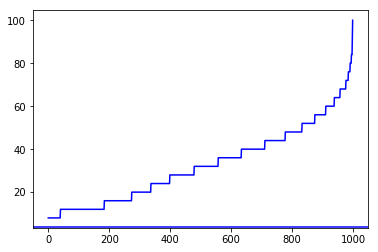

38401


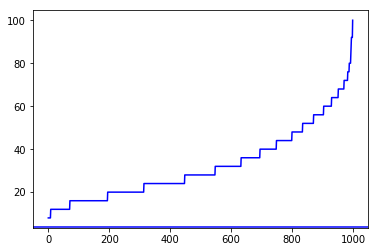

39201


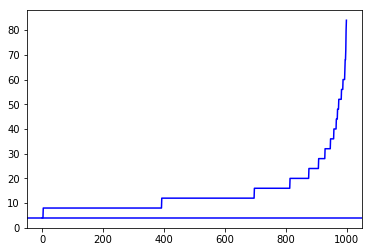

40001


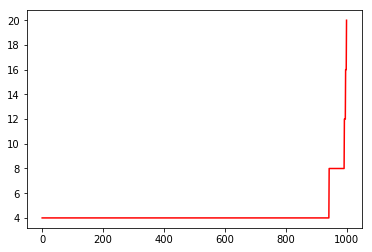

40801


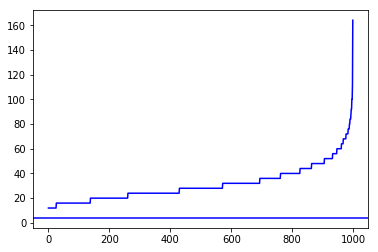

41601


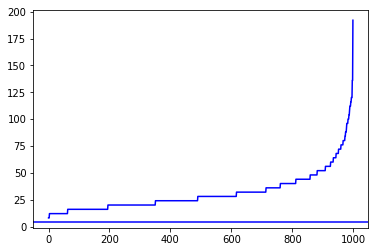

42401


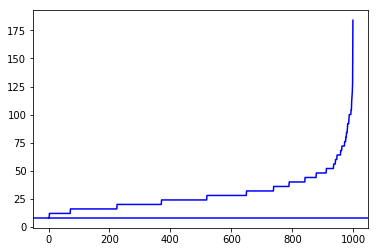

43201


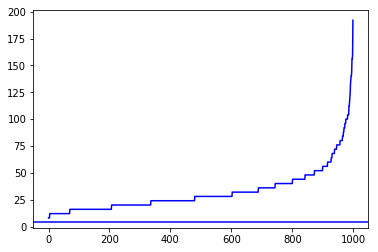

44001


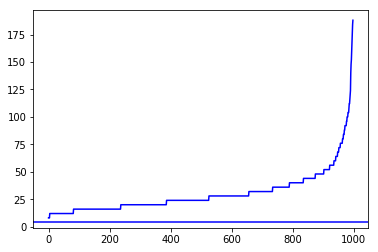

44801


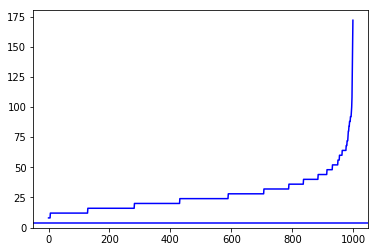

45601


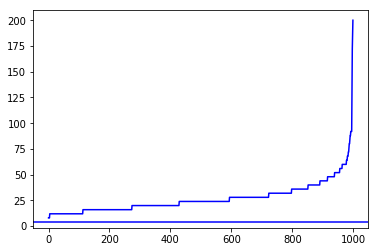

46401


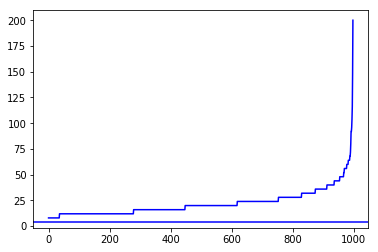

47201


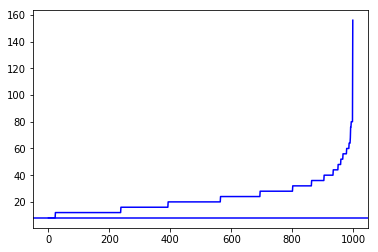

48001


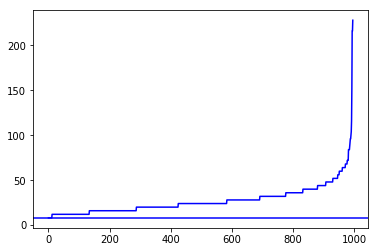

48801


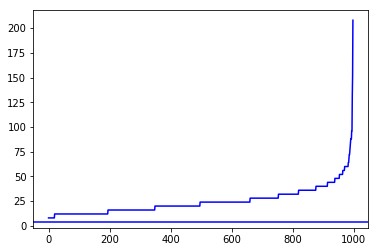

49601


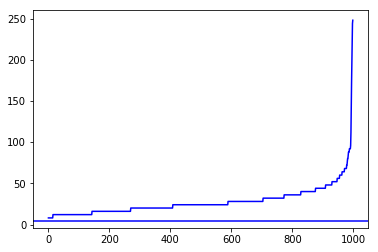

50401


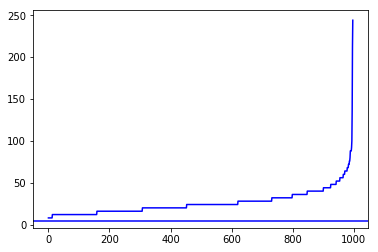

51201


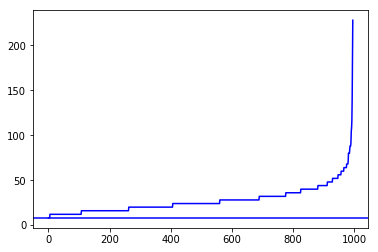

52001


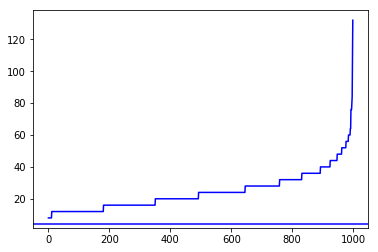

52801


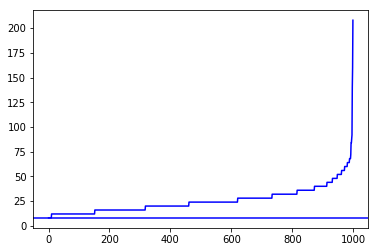

53601


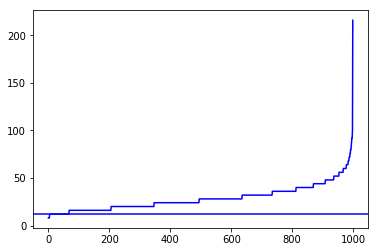

54401


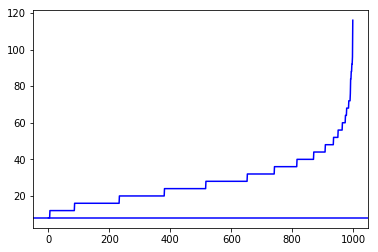

55201


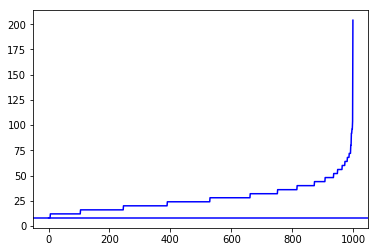

56001


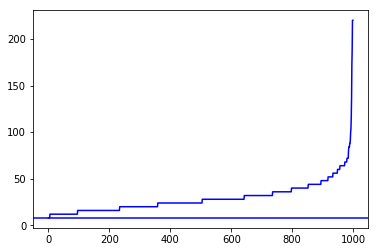

56801


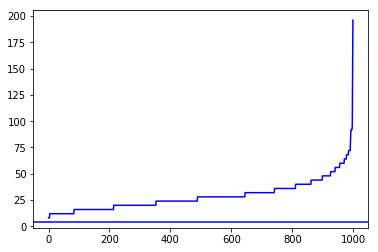

57601


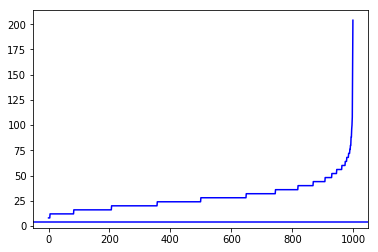

58401


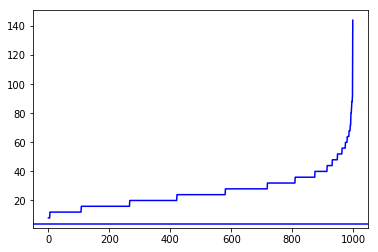

59201


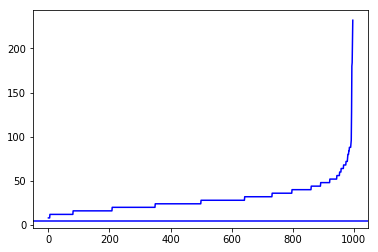

60001


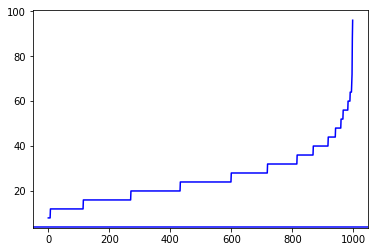

60801


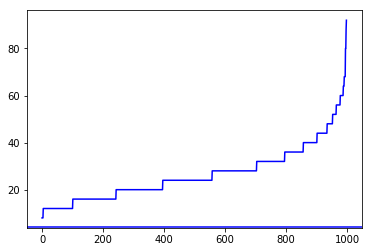

61601


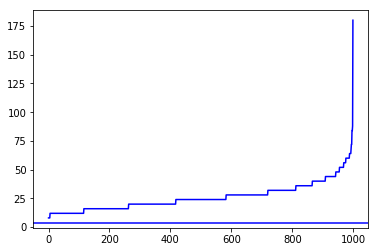

62401


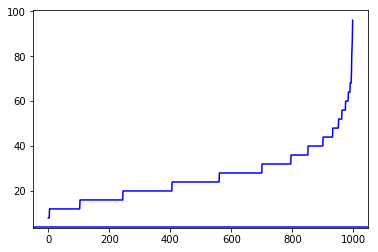

63201


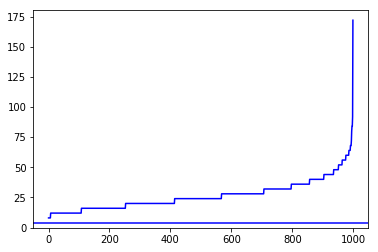

64001


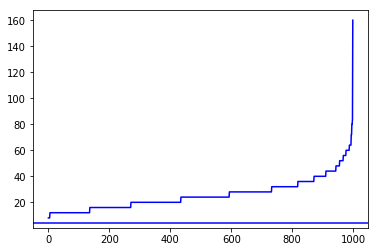

64801


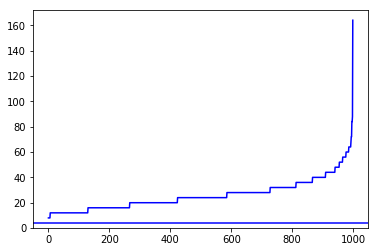

65601


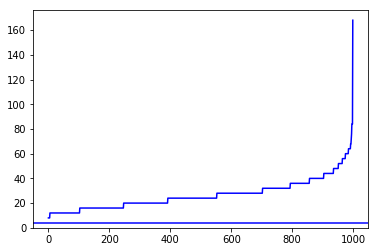

66401


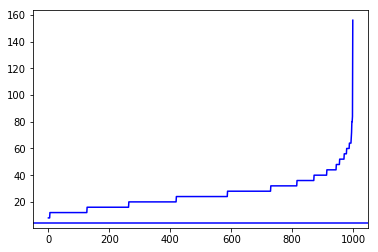

67201


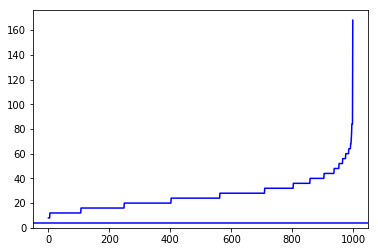

68001


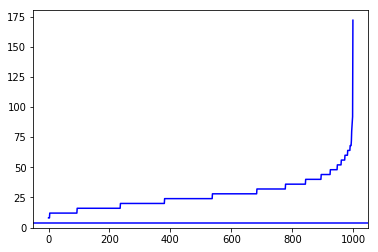

68801


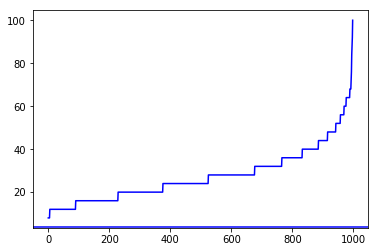

69601


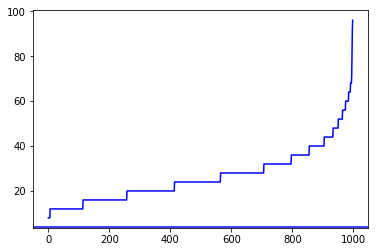

70401


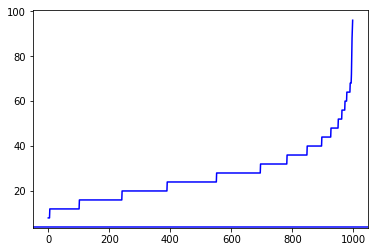

71201


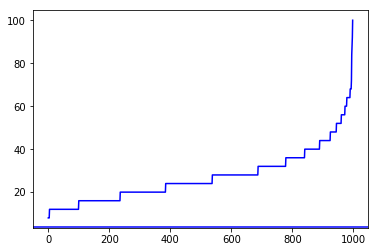

72001


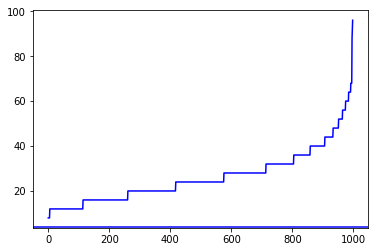

72801


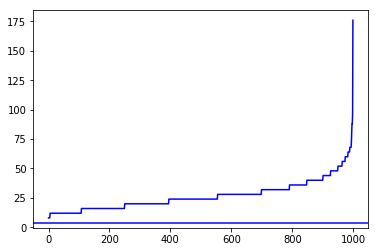

73601


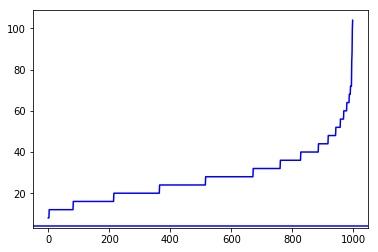

74401


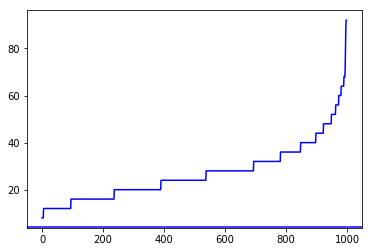

75201


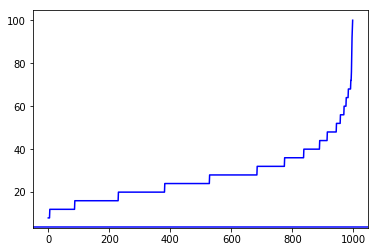

76001


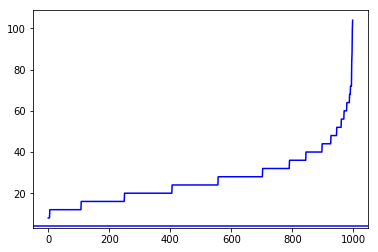

76801


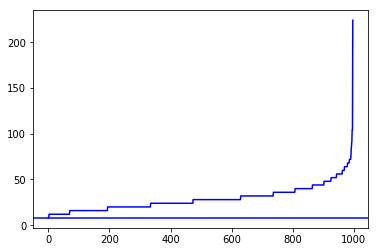

77601


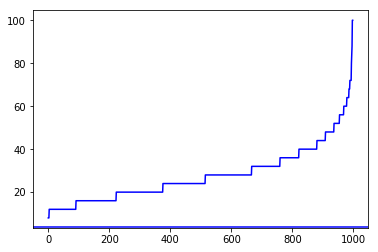

78401


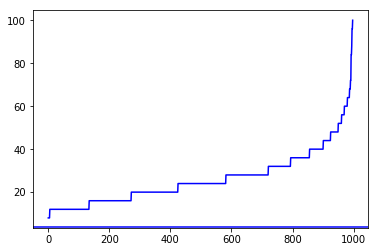

79201


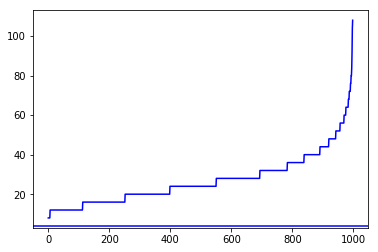

80000


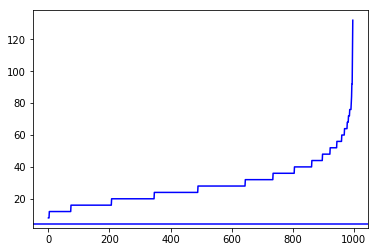

In [8]:
# not used currently
modelname = 'wide_adv'
dataset = 'test'; index = 6705
# dataset = 'train'; index = 38894
steps = range(1, 80000, 800) + [80000]
labels = np.load('gxr_%s/%s%d_labels.npy' % (modelname, dataset, index))
label0 = labels.squeeze(0)
for step in steps:
    conf = np.load('gxr_%s/%s%d_step%d.npy' % (modelname, dataset, index, step))
    cp = np.load('gxr_%s/center_preds_%s%d_step%d.npy' % (modelname, dataset, index, step))
    if cp.squeeze(0) != label0:
        color = 'r'
    else:
        color = 'b'

    print step
    amin = np.amin(conf, axis=1)
    argmin = np.argmin(conf, axis=1)
    gxr = np.where(np.equal(amin, 0), mags[argmin], np.nan)
    gxgrad = gxr[1000]
    gxrand = gxr[:1000]
    plt.plot(np.sort(gxrand), color=color)
    plt.axhline(gxgrad, color=color)
    plt.show()